In [1]:
from ultralytics import YOLO
import torch
import cv2

In [2]:
import os
os.path.exists("model/model_seg.pt")

True

In [3]:
model_seg = YOLO(r".\model\model_seg.pt")
model_dect = YOLO(r".\model\model_detect.pt")

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device: ", device)

device:  cuda



image 1/1 c:\Users\1tram\OneDrive\Documents\KLTN-NAM\data\detection-task\images\test\Duong_1_cam_1_23.png: 384x640 1 Lane, 119.5ms
Speed: 6.8ms preprocess, 119.5ms inference, 30.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 c:\Users\1tram\OneDrive\Documents\KLTN-NAM\data\detection-task\images\test\Duong_1_cam_1_23.png: 288x512 8 xe_mays, 1 xe_oto, 56.7ms
Speed: 0.6ms preprocess, 56.7ms inference, 0.8ms postprocess per image at shape (1, 3, 288, 512)


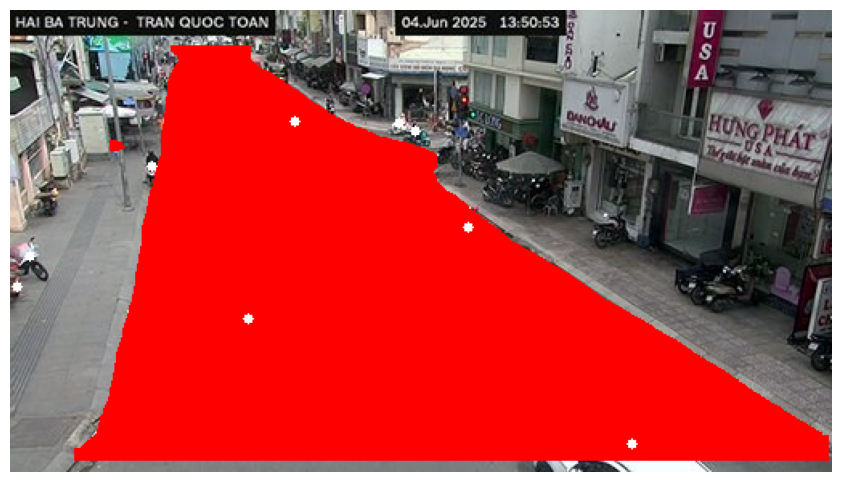

In [5]:
import matplotlib.pyplot as plt

# Đường dẫn ảnh
img_path = r"data\detection-task\images\test\Duong_1_cam_1_23.png"

# Đọc ảnh gốc
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w = img.shape[:2]

# Dự đoán lane segmentation
lane = model_seg.predict(source=img_path, device=device, save=False, show=False)
mask_lane = lane[0].masks.data  # tensor [num_objects, H, W]

# Dự đoán object detection
obj = model_dect(source=img_path, device=device, save=False, show=False)[0]

# Vẽ lane mask màu đỏ
for mask in mask_lane:
    mask = mask.cpu().numpy()
    mask_resized = cv2.resize(mask, (w, h))  # resize về ảnh gốc
    img[mask_resized > 0.5] = [255, 0, 0]   # tô đỏ

# Vẽ tâm bounding box object detection màu trắng
for box in obj.boxes.xyxy:
    x1, y1, x2, y2 = box.int().tolist()
    cx = (x1 + x2) // 2
    cy = (y1 + y2) // 2
    cv2.circle(img, (cx, cy), 3, (255, 255, 255), -1)

# Hiển thị ảnh kết quả
plt.figure(figsize=(12,6))
plt.imshow(img)
plt.axis('off')
plt.show()